# `[11] RNN last`

# Analyzing the sequence of data with RNNs
`-` 중간의 style transfer 부분의 VGG 모델 사용부분은 간단한 실습으로 마무리되어 pre-trained 모델 사용에 대한 자세한 내용을 다른 책에서 언급하겠습니다.

# Intro

**핵심** <br>
concept of RNNs and solve sequential data
<br>

**키워드(keyword)** <br>
LSTM network , long-term, short-term memory , NLP , ... 

# **RNN** (Recurrent Neural Networks)

개발초기 : RNN 은 1980년대에 개발되었고 LSTM 은 1990년대에 개발되었다. 이제 상용화된 것은 인터넷 메모리 저장할 수 있는 능력이 이제 도달했기 때문이다.

`-` NLP (RNN 을 근본으로 사용되는 최근 모델) <br> 
- 사람의 언어를 대표하는 모델이다. 딥러닝에서 아마(perhaps) 가장 오래 탐구된 영역이고 의심할 필요없이 (undoubtedly) RNN을 사용할 때 선호되는 데이터 문제이다.
- NLP train 방식 : 책과 시를 인풋으로 주고 이 때 만들어낼 것의 목적을 함께 주어 새로운 texts 를 만들어 낼 수 있게 한다.
- 챗봇에 사용 , 공식화된 문장을 사용가능하게 함.

## 기본적인 방식

- RNN 은 short-term 방식으로 neural network 의 그림에서 각각의 퍼셉트론에게 바로 `이전의 데이터`를 가중치로 이용하여 계산에 도움을 주는 방식이다.
- 그림을 보자면
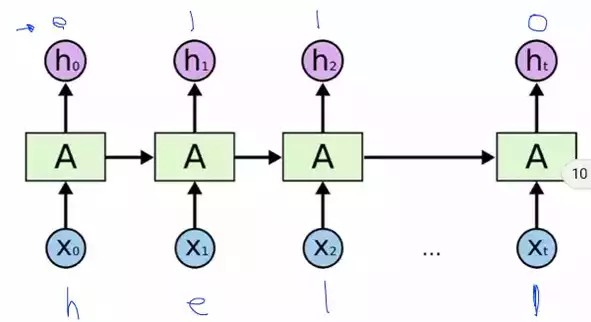

<br>
이 그림에서 말하고자하는 것은 `A -> A` 화살표를 강조하여 가중치가 이전의 가중치가 직접적으로 영향을 간다는 것을 중요시하고 있다.

<br>
- 다음 그림을 보자면
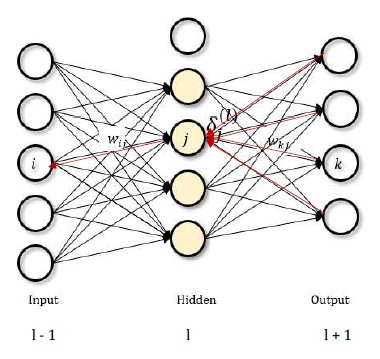

<br>
이 그림에서는 현재의 가중치가 바로 다음의 가중치에도 영향을 주고 이전의 가중치에도 영향을 받았다는 것을 암시하고 있다.

<br>

- 다음 그림을 보자면
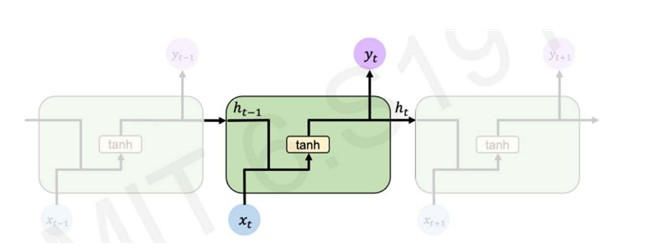
<br>

이 그림은 RNN 의 내부 작동 방식이고 단순하게 tanh 만 사용하여 만든 것처럼 보이고 실제로 그러하다. <br>

**공식**<br>
$$ M_t = tanh(W* [M_(t-1) , E_t ] +b ) $$
<br>
꽤나 가독성이 떨어지게 생긴 식이다. 우리가 평소에 퍼셉트론을 공부했을 때의 공식이 $[M_(t-1) , E_t ] +b$ 이고 가볍게 $M_(t-1) , E_t$ 으로 이루어진 함수 * 가중치 +b (bias) 를 tanh 라는 activation function(비선형함수) 에 넣어서 업데이트하는 방식이라고 보면된다.


그리고 이 방식을 통해 가중치 및 공식이 업데이트되고 가장중요한 것은 `short-term` 으로 진행된다는 것을 깨닫는 것이다.
<br>
`short-term` 은 짧은 기간으로 바로 이전의 가중치만을 업데이트한다는 것으로 `long-term` 이랑 비교를 해보면서 왜 이것이 `short-term` 인지 확인해보자.
<br>
`long-term` 의 대표적인 설명으로 LSTM 모델이 있다. 다음 그림을 보자.
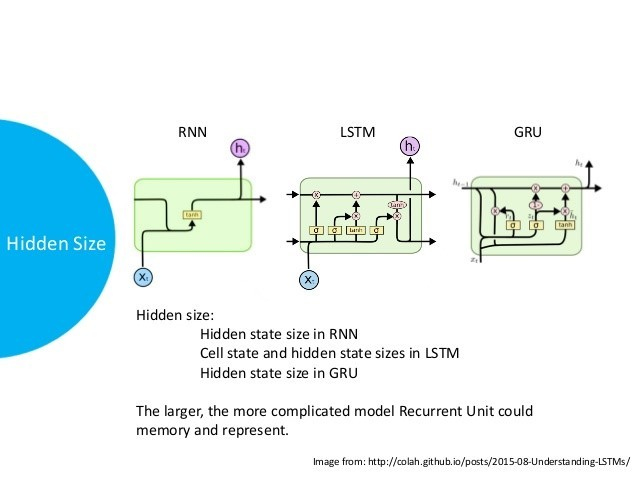
<br>

이 그림은 RNN 과 LSTM 만을 볼 것이다. 가볍게 GRU 도 RNN 에서 나아간 형태 중 하나로 인식하면 된다.
<br>
LSTM 의 형태를 자세히 보는 것도 중요하니 다음 교재인 `텐초의 파이토치`에서 더 자세히 다루어 볼 것이다. LSTM 을 가볍게 보자면

<br>

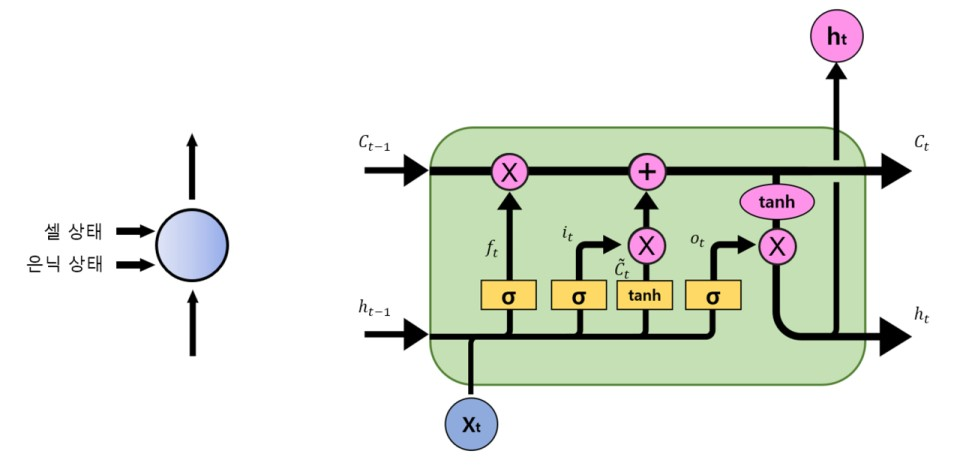

<br>
LSTM 을 보면 C 는 지속적으로 진행되는 `long-term line` 으로 누적되어 계산을 도와주고 h 는 `short-term line` 으로 발보 이전의 가중치를 사용하여 계산하는 방식을 사용한다.

### `-` RNN 의 아웃풋 형태는 매우 다양하다. 
<br>1대1 , 1대 다 , 다대다 형식으로 많이 있으며 그때그때마다 다 쓸 수 있다고 알아두면 편하다.
<br>

예를 들어
- 1대1(One-to-One) 모델은 감정분석 (글을 보고 긍정적인지 부정적인지 판단하는 모델) 
- 1대다(One-to-Many) 모델은 그림을 보고 어떤 문장을 생성한다 
- 다대다(Many-to-Many) 형식은 많은 챗봇처럼 긴 글을 보고 긴 글로 답하는 형식에서 사용된다.